# Code to read ILC weights and ILC residuals
## Weights are band-dependent and computed to obtain a mimimum variance (MV) Compton-$y$ map with the standard ILC technique

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import modules
import numpy as np, os
from pylab import *

In [3]:
rcParams['figure.dpi'] = 150

In [4]:
#read file
fname = 'ilc_weights_residuals.npy'
ilc_dict = np.load(fname, allow_pickle = True).item()
els = ilc_dict['els']

In [5]:
#for plotting
exp_color_dict = {'Fiducial': 'black', 'CMB-HD': 'darkred', 'S4-Ultra Deep': 'orangered', \
'S4-Wide': 'darkgreen', 'SPT-3G': 'goldenrod', 'SO-Goal': 'lightskyblue', 'SO-Baseline': 'royalblue', \
'SPTpol': 'navy', 'SPT-SZ': 'slateblue'}


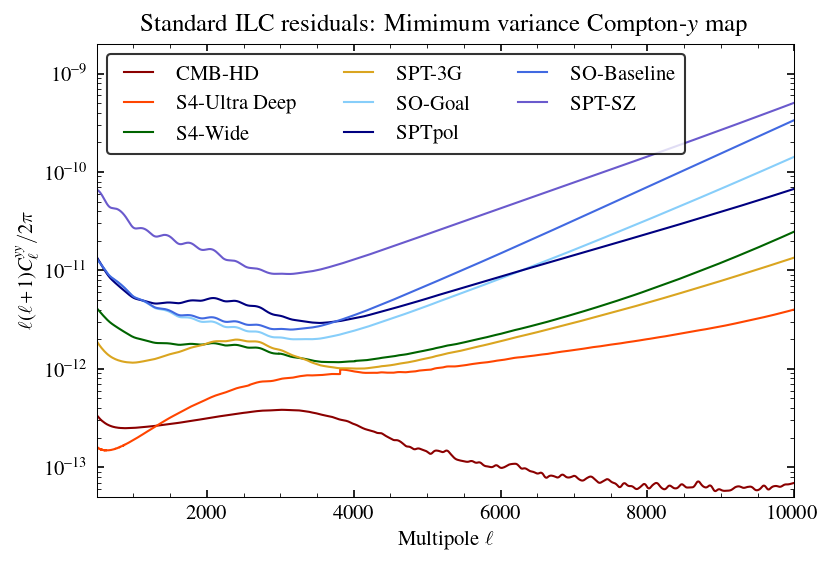

In [6]:
#get ILC residuals and plot them
dl_fac = els * (els+1)/2/np.pi
ax = subplot(111, yscale = 'log')
for expname in ilc_dict['ilc_residuals']:
    nl_yy = ilc_dict['ilc_residuals'][expname]
    plot(els, dl_fac * nl_yy, color = exp_color_dict[expname], label = r'%s' %(expname))
legend(loc = 2, ncol = 3)
xlim(500, 10000)
ylim(5e-14, 2e-9)
xlabel(r'Multipole $\ell$')
ylabel(r'$\ell (\ell+1) C_{\ell}^{yy}/2 \pi$')
title(r'Standard ILC residuals: Mimimum variance Compton-$y$ map')
show()

(7, 12001)
(6, 12001)
(6, 12001)
(4, 12001)
(6, 12001)
(4, 12001)
(6, 12001)
(4, 12001)


Text(0.5, 1.0, 'Compton-$y$ (MV) ILC weights for S4-Wide')

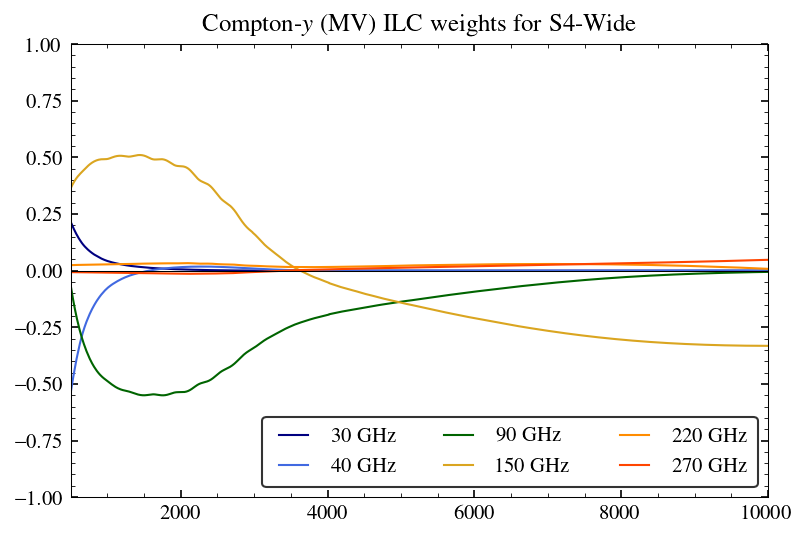

In [12]:
#get weights
ilc_weights_dict = {}
for expname in ilc_dict['weights']:    
    weights = ilc_dict['weights'][expname] #these are freqeuency dependent weights.
    print(weights.shape) #number of bands x len(els)
    ilc_weights_dict[expname] = weights

#plot weights for S4-wide
nu_color_dict = {30: ['navy', (0, (4,10))], 40: ['royalblue', (0, (4,8))], 90:['darkgreen', '--'], 150: ['goldenrod', '-'], 220: ['darkorange', '-.'], 270: ['orangered', ':'], 353: ['darkred', (0, (1,5))]}

reqd_expname = 'S4-Wide'
bands = ilc_dict['bands'][reqd_expname]
band_weights = ilc_weights_dict[reqd_expname]
ax = subplot(111)
for nuind, nu in enumerate( bands ):
    colorval, lsval = nu_color_dict[nu]
    lsval = '-'
    plot(els, band_weights[nuind], color = colorval, ls = lsval, label = r'%s GHz' %(nu))
legend(loc = 4, ncol = 3)
xlim(500, 10000)
ylim(-1., 1.)
axhline(lw = 0.5)
title(r'Compton-$y$ (MV) ILC weights for %s' %(reqd_expname))